## Data cleaning / pre-processing

## Part 1: Reshape and merge datasets

In this part, we will tidy the form of two raw datasets, and finally merge them into one dataset.

### 1.1  Reshape Food Security Indicators dataset

***Import libraries and read dataset***

In [1]:
import numpy as np
import pandas as pd
df1=pd.read_csv('ASEAN_Food Security Indicators-raw.csv')
df1.head()

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20002002,2000-2002,%,123,F,FAO estimate,NaN
1,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20012003,2001-2003,%,125,F,FAO estimate,NaN
2,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20022004,2002-2004,%,127,F,FAO estimate,NaN
3,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20032005,2003-2005,%,127,F,FAO estimate,NaN
4,FS,Suite of Food Security Indicators,26,Brunei Darussalam,6121,Value,21010,Average dietary energy supply adequacy (percen...,20042006,2004-2006,%,127,F,FAO estimate,NaN


***Drop useless or duplicated columns***

In [2]:
df1=df1.drop(['Domain Code', 'Domain','Area Code (FAO)', 'Year Code','Element Code','Element',
            'Item Code','Unit', 'Flag',
              'Flag Description','Note'], axis=1)
df1.head()

,Area,Item,Year,Value
0,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2000-2002,123
1,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2001-2003,125
2,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2002-2004,127
3,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2003-2005,127
4,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2004-2006,127


***Deal with NAs***

We first change them to 0 temporarily for reshapinig data, and will change them back to NA after get the merged dataset.

In [3]:
# Compute missing values
df1.isnull().sum().sum()

124

In [4]:
# Impute missing values to 0 temporarily
df1.fillna(0,inplace=True)
print(df1.isnull().sum().sum())

0


***Formatting columns***

In [5]:
# Formatting 'Year' column
for i in range(len(df1)):
    if len(df1.iloc[i,2])==9:
        df1.iloc[i,2]=int((int(df1.iloc[i,2][0:4])+int(df1.iloc[i,2][5:]))/2)
    elif len(df1.iloc[i,2])==4:
        df1.iloc[i,2]=int(df1.iloc[i,2])
    else:
        print('There is an error in Year column')
df1.head()

,Area,Item,Year,Value
0,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2001,123
1,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2002,125
2,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2003,127
3,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2004,127
4,Brunei Darussalam,Average dietary energy supply adequacy (percen...,2005,127


In [6]:
# Formatting 'Value' column
df1['Value'] = df1.Value.apply(str)
index = df1[df1['Value'].str.contains('<'or'>')].index
for i in index:
    df1.iloc[i,3] = df1.iloc[i,3][1:]
    pass
df1['Value'] = pd.to_numeric(df1['Value'], downcast='float')

***Reshape dataframe organized by Item***

In [7]:
from pandas import pivot
df1=df1.pivot_table(index=['Area','Year'],columns='Item',values='Value')
df1=df1.reset_index()
df1.head()

Item,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of anemia among women of reproductive age (15-49 years),Prevalence of exclusive breastfeeding among infants 0-5 months of age,Prevalence of low birthweight (percent),Prevalence of moderate or severe food insecurity in the total population (percent) (3-year average),Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average)
0,Brunei Darussalam,2000,2323.0,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,17.100000,NaN,10.3,NaN,7.2,NaN,NaN,NaN,NaN,NaN
1,Brunei Darussalam,2001,2329.0,123.0,75.699997,87.400002,45.400002,81.0,100.000000,0.21,...,16.600000,NaN,9.5,NaN,7.5,NaN,2.6,NaN,50.0,5.0
2,Brunei Darussalam,2002,2337.0,125.0,78.699997,89.699997,47.700001,85.0,99.599998,0.21,...,16.299999,NaN,9.2,NaN,7.9,NaN,2.5,NaN,48.0,4.0
3,Brunei Darussalam,2003,2345.0,127.0,81.699997,90.300003,48.299999,86.0,95.699997,0.21,...,16.000000,NaN,9.1,NaN,8.2,NaN,2.5,NaN,47.0,4.0
4,Brunei Darussalam,2004,2352.0,127.0,81.000000,88.599998,47.299999,76.0,93.800003,0.21,...,15.700000,NaN,9.2,NaN,8.6,NaN,2.5,NaN,46.0,4.0


### 1.2 Reshape Consumer Price indices dataset

***Read dataset***

In [8]:
df2=pd.read_csv('ASEAN_Consumer Price Indices-raw.csv')
df2.head()

,Domain Code,Domain,Area Code (M49),Area,Year Code,Year,Item Code,Item,Months Code,Months,Unit,Value,Flag,Flag Description,Note
0,CP,Consumer Price Indices,96,Brunei Darussalam,2000,2000,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,88.959933,F,FAO estimate,base year is 2015
1,CP,Consumer Price Indices,96,Brunei Darussalam,2001,2001,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,89.702503,F,FAO estimate,base year is 2015
2,CP,Consumer Price Indices,96,Brunei Darussalam,2002,2002,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,90.146512,F,FAO estimate,base year is 2015
3,CP,Consumer Price Indices,96,Brunei Darussalam,2003,2003,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,90.365320,F,FAO estimate,base year is 2015
4,CP,Consumer Price Indices,96,Brunei Darussalam,2004,2004,23013,"Consumer Prices, Food Indices (2015 = 100)",7001,January,NaN,89.822766,F,FAO estimate,base year is 2015


***Drop useless or duplicated variables***

In [9]:
df2=df2.drop(['Domain Code', 'Domain','Area Code (M49)', 'Year Code',
            'Item Code','Months Code', 'Flag',
              'Flag Description','Note','Unit'], axis=1)
df2.head()

,Area,Year,Item,Months,Value
0,Brunei Darussalam,2000,"Consumer Prices, Food Indices (2015 = 100)",January,88.959933
1,Brunei Darussalam,2001,"Consumer Prices, Food Indices (2015 = 100)",January,89.702503
2,Brunei Darussalam,2002,"Consumer Prices, Food Indices (2015 = 100)",January,90.146512
3,Brunei Darussalam,2003,"Consumer Prices, Food Indices (2015 = 100)",January,90.365320
4,Brunei Darussalam,2004,"Consumer Prices, Food Indices (2015 = 100)",January,89.822766


In [10]:
# split 'Months' column into separate columns
from pandas import pivot
df2=df2.pivot_table(index=['Area','Year','Item'],columns='Months',values='Value')
df2=df2.reset_index()
df2.head()

Months,Area,Year,Item,April,August,December,February,January,July,June,March,May,November,October,September
0,Brunei Darussalam,2000,"Consumer Prices, Food Indices (2015 = 100)",89.152073,89.408259,89.664445,89.023980,88.959933,89.344212,89.280166,89.088026,89.216119,89.600398,89.536352,89.472305
1,Brunei Darussalam,2000,"Consumer Prices, General Indices (2015 = 100)",94.856250,95.560047,95.560047,94.465251,94.230652,95.325448,95.247248,94.778050,94.856250,95.403648,95.794646,95.638247
2,Brunei Darussalam,2001,"Consumer Prices, Food Indices (2015 = 100)",89.816677,89.968908,90.121140,89.740561,89.702503,89.930850,89.892793,89.778619,89.854735,90.083082,90.045024,90.006966
3,Brunei Darussalam,2001,"Consumer Prices, General Indices (2015 = 100)",96.185645,96.263845,92.588458,95.951046,95.872846,96.263845,96.263845,96.029246,96.185645,94.074253,96.420244,96.420244
4,Brunei Darussalam,2001,Food price inflation,0.745472,0.627067,0.509338,0.804931,0.834724,0.656604,0.686185,0.775180,0.715807,0.538707,0.568118,0.597571


In [11]:
# impute na using mean method
df2_1=df2.iloc[:,3:15]
a1=np.where(np.isnan(df2_1))[0]
a2=np.where(np.isnan(df2_1))[1]
for i in a1:
    for j in a2:
        df2_1.iloc[i,j]=df2_1.iloc[i].mean()

In [12]:
# add new column by mean value of months
df2['Value']=df2_1.apply(lambda x: x.mean(),axis=1)

In [13]:
# drop months columns
df2=df2.drop(['January','February','March','April','May','June','July','August','September','October','November','December'], axis=1)
df2.head()

Months,Area,Year,Item,Value
0,Brunei Darussalam,2000,"Consumer Prices, Food Indices (2015 = 100)",89.312189
1,Brunei Darussalam,2000,"Consumer Prices, General Indices (2015 = 100)",95.142982
2,Brunei Darussalam,2001,"Consumer Prices, Food Indices (2015 = 100)",89.911821
3,Brunei Darussalam,2001,"Consumer Prices, General Indices (2015 = 100)",95.709930
4,Brunei Darussalam,2001,Food price inflation,0.671642


***Reshape dataframe organized by Item***

In [14]:
# split the 'Item' column into Food Indices, General Indices, and inflation rates
df2=df2.pivot_table(index=['Area','Year'],columns='Item',values='Value')
df2=df2.reset_index()
df2.head()

Item,Area,Year,"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation
0,Brunei Darussalam,2000,89.312189,95.142982,NaN
1,Brunei Darussalam,2001,89.911821,95.709930,0.671642
2,Brunei Darussalam,2002,90.286058,93.494272,0.416298
3,Brunei Darussalam,2003,90.033759,93.743590,-0.279126
4,Brunei Darussalam,2004,90.485887,94.530500,0.503782


We used same method to reshape another 2 dataset, and will only show the result in slides.

In [15]:
df2.head()

Item,Area,Year,"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation
0,Brunei Darussalam,2000,89.312189,95.142982,NaN
1,Brunei Darussalam,2001,89.911821,95.709930,0.671642
2,Brunei Darussalam,2002,90.286058,93.494272,0.416298
3,Brunei Darussalam,2003,90.033759,93.743590,-0.279126
4,Brunei Darussalam,2004,90.485887,94.530500,0.503782


### 1.3 Select needed data from World Population dataset

***Read dataset***

In [16]:
df3 = pd.read_csv('World Population - World Bank.csv',skiprows=[0,1,2,3])
df3.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN,NaN
3,Africa Western and Central,AFW,"Population, total",SP.POP.TOTL,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,...,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0,NaN,NaN
4,Angola,AGO,"Population, total",SP.POP.TOTL,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,...,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0,NaN,NaN


***Drop columns***

In [17]:
df3 = df3.drop(['Country Code', 'Indicator Name', 'Indicator Code','2021','Unnamed: 66'], axis = 1)
df3.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,57702.0,58044.0,58377.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,152752671.0,156876454.0,161156430.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,10174840.0,10399936.0,10637064.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,96396419.0,98407221.0,100506960.0,102691339.0,104953470.0,107289875.0,109701811.0,112195950.0,114781116.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,5454938.0,5531451.0,5608499.0,5679409.0,5734995.0,5770573.0,5781305.0,5774440.0,5771973.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


***Select year 2000 - 2020***

In [18]:
year = np.arange(2000,2021)
col = ['Country Name']
for i in year:
    col.append(str(i))
df3 = df3[col]
df3.head()

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,90866.0,92892.0,94992.0,97016.0,98744.0,100028.0,100830.0,101226.0,101362.0,...,102050.0,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0
1,Africa Eastern and Southern,398113044.0,408522129.0,419223717.0,430246635.0,441630149.0,453404076.0,465581372.0,478166911.0,491173160.0,...,532760424.0,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0
2,Afghanistan,20779957.0,21606992.0,22600774.0,23680871.0,24726689.0,25654274.0,26433058.0,27100542.0,27722281.0,...,30117411.0,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0
3,Africa Western and Central,267214544.0,274433894.0,281842480.0,289469530.0,297353098.0,305520588.0,313985474.0,322741656.0,331772330.0,...,360285439.0,370243017.0,380437896.0,390882979.0,401586651.0,412551299.0,423769930.0,435229381.0,446911598.0,458803476.0
4,Angola,16395477.0,16945753.0,17519418.0,18121477.0,18758138.0,19433604.0,20149905.0,20905360.0,21695636.0,...,24220660.0,25107925.0,26015786.0,26941773.0,27884380.0,28842482.0,29816769.0,30809787.0,31825299.0,32866268.0


***Transpose dataset***

In [19]:
df3 = df3.set_index('Country Name').transpose()
df3 = df3.rename_axis('Year').reset_index()
df3.head()
#df3.iloc[0,0]

Country Name,Year,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,...,Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,2000,90866.0,398113044.0,20779957.0,267214544.0,16395477.0,3089027.0,65390.0,282344141.0,3134067.0,...,108642.0,79910411.0,184964.0,6.114324e+09,174454.0,1700000.0,17409071.0,44967713.0,10415942.0,11881482.0
1,2001,92892.0,408522129.0,21606992.0,274433894.0,16945753.0,3060173.0,67344.0,288432153.0,3302722.0,...,108549.0,80742500.0,189209.0,6.193664e+09,175394.0,1701154.0,17918369.0,45571272.0,10692197.0,11923906.0
2,2002,94992.0,419223717.0,22600774.0,281842480.0,17519418.0,3051010.0,70048.0,294665202.0,3478769.0,...,108509.0,81534406.0,193927.0,6.272724e+09,176410.0,1702310.0,18443684.0,46150913.0,10971704.0,11954293.0
3,2003,97016.0,430246635.0,23680871.0,289469530.0,18121477.0,3039616.0,73180.0,301113869.0,3711931.0,...,108505.0,82301650.0,198960.0,6.351856e+09,177481.0,1703466.0,18985001.0,46719203.0,11256740.0,11982219.0
4,2004,98744.0,441630149.0,24726689.0,297353098.0,18758138.0,3026939.0,76250.0,307862846.0,4068577.0,...,108466.0,83062819.0,204123.0,6.431527e+09,178597.0,1704622.0,19540096.0,47291610.0,11550641.0,12019911.0


***Select certain country we need***

In [20]:
Area = ['Brunei Darussalam', 'Cambodia', 'Indonesia',
       'Lao PDR', 'Malaysia', 'Myanmar',
       'Philippines', 'Singapore', 'Thailand', 'Vietnam']
col=['Year']
for i in Area:
    col.append(i)
df3 = df3[col]


***Rename Areas for consistency***

In [21]:
df3.rename(columns = {'Lao PDR':"Lao People's Democratic Republic", 'Vietnam':'Viet Nam'}, inplace = True)
df3.head()

Country Name,Year,Brunei Darussalam,Cambodia,Indonesia,Lao People's Democratic Republic,Malaysia,Myanmar,Philippines,Singapore,Thailand,Viet Nam
0,2000,333166.0,12155241.0,211513822.0,5323701.0,23194252.0,46719698.0,77991757.0,4027887.0,62952639.0,79910411.0
1,2001,340037.0,12405411.0,214427419.0,5409584.0,23709115.0,47225119.0,79672869.0,4138012.0,63539190.0,80742500.0
2,2002,346777.0,12637719.0,217357790.0,5493247.0,24208391.0,47702163.0,81365260.0,4175950.0,64069093.0,81534406.0
3,2003,353295.0,12856171.0,220309473.0,5576640.0,24698821.0,48148907.0,83051970.0,4114826.0,64549867.0,82301650.0
4,2004,359434.0,13066475.0,223285666.0,5662199.0,25190647.0,48564489.0,84710544.0,4166664.0,64995303.0,83062819.0


***Reshape dataframe***

In [22]:
df3 = pd.melt(df3, id_vars = ('Year'), value_vars = list(df3.columns[1:]),
         var_name = 'Area', value_name = 'Population_total')
df3['Year'] = df3['Year'].astype(int)


In [23]:
df3.head()

,Year,Area,Population_total
0,2000,Brunei Darussalam,333166.0
1,2001,Brunei Darussalam,340037.0
2,2002,Brunei Darussalam,346777.0
3,2003,Brunei Darussalam,353295.0
4,2004,Brunei Darussalam,359434.0


### 1.4 Combine three datasets

In [24]:
# combine 3 dataframes
data = pd.concat((df.set_index(['Area','Year']) for df in [df1, df2, df3]),axis=1, join='inner').reset_index()
data.head()


,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation,Population_total
0,Brunei Darussalam,2000,2323.0,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,7.2,NaN,NaN,NaN,NaN,NaN,89.312189,95.142982,NaN,333166.0
1,Brunei Darussalam,2001,2329.0,123.0,75.699997,87.400002,45.400002,81.0,100.000000,0.21,...,7.5,NaN,2.6,NaN,50.0,5.0,89.911821,95.709930,0.671642,340037.0
2,Brunei Darussalam,2002,2337.0,125.0,78.699997,89.699997,47.700001,85.0,99.599998,0.21,...,7.9,NaN,2.5,NaN,48.0,4.0,90.286058,93.494272,0.416298,346777.0
3,Brunei Darussalam,2003,2345.0,127.0,81.699997,90.300003,48.299999,86.0,95.699997,0.21,...,8.2,NaN,2.5,NaN,47.0,4.0,90.033759,93.743590,-0.279126,353295.0
4,Brunei Darussalam,2004,2352.0,127.0,81.000000,88.599998,47.299999,76.0,93.800003,0.21,...,8.6,NaN,2.5,NaN,46.0,4.0,90.485887,94.530500,0.503782,359434.0


***Save data***

In [25]:
data.to_csv(r'ASEAN_Consumer Price&Food Security Indicators-merged.csv',index=False)

## Part 2: Handle missing data

In this part, we use Random Forest Regressor model combined mean method to impute missing values.

### 2.1 Initial understanding of the dataset

***Import libraries and read dataset***

In [26]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
df=pd.read_csv('ASEAN_Consumer Price&Food Security Indicators-merged.csv')
df.head()

,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of obesity in the adult population (18 years and older),Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation,Population_total
0,Brunei Darussalam,2000,2323.0,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,7.2,NaN,NaN,NaN,NaN,NaN,89.312189,95.142982,NaN,333166.0
1,Brunei Darussalam,2001,2329.0,123.0,75.7,87.4,45.4,81.0,100.0,0.21,...,7.5,NaN,2.6,NaN,50.0,5.0,89.911821,95.709930,0.671642,340037.0
2,Brunei Darussalam,2002,2337.0,125.0,78.7,89.7,47.7,85.0,99.6,0.21,...,7.9,NaN,2.5,NaN,48.0,4.0,90.286058,93.494272,0.416298,346777.0
3,Brunei Darussalam,2003,2345.0,127.0,81.7,90.3,48.3,86.0,95.7,0.21,...,8.2,NaN,2.5,NaN,47.0,4.0,90.033759,93.743590,-0.279126,353295.0
4,Brunei Darussalam,2004,2352.0,127.0,81.0,88.6,47.3,76.0,93.8,0.21,...,8.6,NaN,2.5,NaN,46.0,4.0,90.485887,94.530500,0.503782,359434.0


***See the dimension of dataset***

In [27]:
print('The dataset contains', np.shape(df)[0], 'rows and', np.shape(df)[1], 'columns.')

The dataset contains 210 rows and 48 columns.


***Rename vars of Indicators***

In [28]:
# Backup indicators name
indicators = df.columns.values[2:].copy()
# Rename variables
li = []
for i in range(1,len(indicators)+1):
    li.append('ind' + str(i))
df.columns.values[2:] = li
# Reindex df
df = df.reindex()
df.head()


,Area,Year,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,...,ind37,ind38,ind39,ind40,ind41,ind42,ind43,ind44,ind45,ind46
0,Brunei Darussalam,2000,2323.0,NaN,NaN,NaN,NaN,NaN,NaN,0.21,...,7.2,NaN,NaN,NaN,NaN,NaN,89.312189,95.142982,NaN,333166.0
1,Brunei Darussalam,2001,2329.0,123.0,75.7,87.4,45.4,81.0,100.0,0.21,...,7.5,NaN,2.6,NaN,50.0,5.0,89.911821,95.709930,0.671642,340037.0
2,Brunei Darussalam,2002,2337.0,125.0,78.7,89.7,47.7,85.0,99.6,0.21,...,7.9,NaN,2.5,NaN,48.0,4.0,90.286058,93.494272,0.416298,346777.0
3,Brunei Darussalam,2003,2345.0,127.0,81.7,90.3,48.3,86.0,95.7,0.21,...,8.2,NaN,2.5,NaN,47.0,4.0,90.033759,93.743590,-0.279126,353295.0
4,Brunei Darussalam,2004,2352.0,127.0,81.0,88.6,47.3,76.0,93.8,0.21,...,8.6,NaN,2.5,NaN,46.0,4.0,90.485887,94.530500,0.503782,359434.0


***See the distribution of missing data***

We imputed some missing values by zero for necessary when formatting the dataset, now first we change them back to NaNs.

In [29]:
for i in range(np.shape(df)[0]):
    for j in range(np.shape(df)[1]):
        if df.iloc[i,j] == 0:
            df.iloc[i,j] = float('NaN')

In [30]:
# Calculate total NAs
df.isnull().sum().sum()

2520

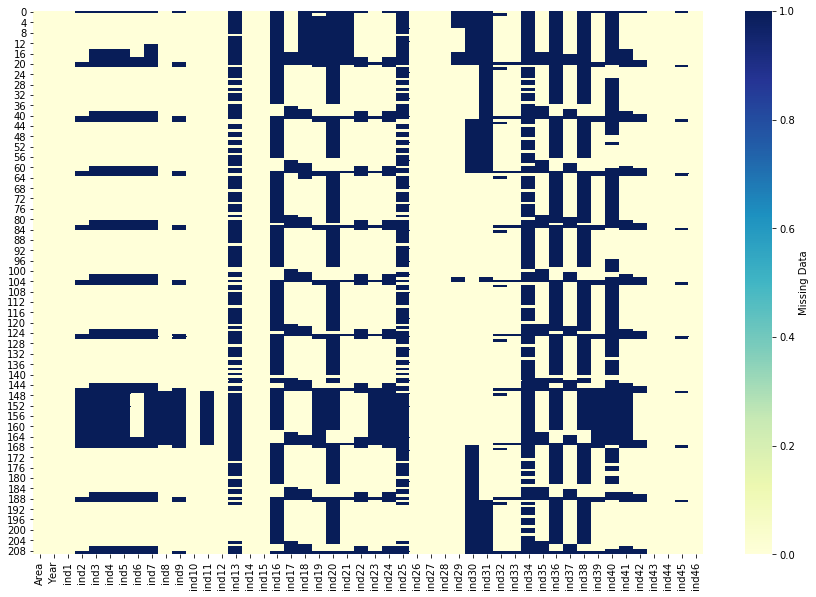

In [31]:
# Visualizing Missing Data using Seaborn heatmap()
plt.figure(figsize=(15,10))
sns.heatmap(df.isna(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})

### 2.2 Imputation of missing data

#### Step 1: Test correlation between complete columns and incomplete columns

***Convert string variables into categorical numeric variables***

In [32]:
# create a categorical numeric variable to result 'Area' into groups
df['Area_cat'] = df['Area'].astype('category')
df['Area_cat'] = df['Area_cat'].cat.codes
# reindex dataset
df = df.reindex(columns = df.columns)
# create df1 with no str variables to test correlation
df1 = df.drop('Area', axis = 1)

***Create correlation table***

In [33]:
# The function creates table shows Pearson Correlation Coefficient (PCC) between complete vars and incomplete vars.
def create_correlation_table(df):
    complete_col = df.loc[:,df.isnull().sum() == 0].columns
    incomplete_col=df.loc[:,df.isnull().sum() != 0].columns
    li1 = []; li2 = []; li3 = []
    for i in incomplete_col:
        for j in complete_col:
            li1.append(i)
            li2.append(j)
            li3.append(df[i].corr(df[j]))
    df_r = {'Incomplete Variables':li1,
           'Complete Variables':li2,
           'PCC':li3}
    df_r = pd.DataFrame(df_r)
    return df_r
df1_r = create_correlation_table(df1) 
df1_r.head()

,Incomplete Variables,Complete Variables,PCC
0,ind2,Year,0.563240
1,ind2,ind1,0.376543
2,ind2,ind10,0.587843
3,ind2,ind12,0.373129
4,ind2,ind14,0.152125


#### Step 2: Create and test model

We create a model to impute NAs base on *Seaborn Random Forest Regressor*, using *Mean Square Error* to test model.

***Some introduction of the model:***

     X_train - This includes all independent variables, will be used to train the model.
     
     X_test - The remaining portion of the independent variables from the data which will not be used in the training phase and will be used to make predictions to test the accuracy of the model.
     
     y_train - This is dependent variable which needs to be predicted by this model, including category labels against your independent variables, we need to specify our dependent variable while training/fitting the model.
     
     y_test - This data has category labels for the test data, these labels will be used to test the accuracy between actual and predicted categories.
     
     R squared - is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.—Wiki

In [34]:
# This function is used to test model by R squared score.
def test_model(df,df_r):
    import warnings
    warnings.filterwarnings('ignore')     # ignore warning message
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import r2_score
    from sklearn.metrics import mean_squared_error
    from sklearn.model_selection import KFold
    kf = KFold(n_splits = 10, random_state = 42)    # n_splits = number of folds, random_state ensure the splits are reproducible
    incomplete_col = df.loc[:,df.isnull().sum() != 0].columns
    high_r2_score=[]
    low_r2_score=[]
    # get absolute value of PCC to select 3 strongest correlated vars of each incomplete var
    df_neg2pos = df_r.copy()
    for index in range(len(df_r.PCC)):
            if df_r.PCC[index] < 0:
                df_neg2pos.PCC[index] = -df_r.PCC[index]     
    for i in incomplete_col:
        df_missing = df[df[i].isnull()].copy()
        df_filter = df.merge(df_missing,how='outer',indicator=True).query('_merge == "left_only"').drop('_merge',1).copy()
        y_pred_rf = []
        y_true_rf = []
        df_split = df_neg2pos[df_neg2pos.iloc[:,0] == i]     # split correlation table by each incomplete variable
        df_split.sort_values(by = ['PCC'], ascending = False, inplace = True)   # sort PCC of each i in incomplete_col
        # correlation-based feature selection
        features = list(df_split.iloc[:3,1].values)       # add 3 strongest correlated vars of each i into features
        features.append('Area_cat')                   # add features
        features.append('Year')                      # add features
        features = list(dict.fromkeys(features))           #de‑duplicate
        for train_index,test_index in kf.split(df_filter):
            df_test = df_filter.iloc[test_index]
            df_train = df_filter.iloc[train_index]
            # X - input(dependent vars), y - output(independent vars)
            X_train = np.array(df_train[features])     
            y_train = np.array(df_train[i])            # the label of each instance
            X_test = np.array(df_test[features])     
            y_test = np.array(df_test[i])        # the set of labels to all the data in x_test
            model = RandomForestRegressor(n_estimators = 200, max_depth = 100, random_state = 42)
            model.fit(X_train,y_train)     # fit model according to complete train set
            y_pred_rf.append(model.predict(X_test)[0])
            y_true_rf.append(y_test[0])
        if r2_score(y_true_rf, y_pred_rf, sample_weight=None, multioutput='uniform_average') > 0.6:
            high_r2_score.append(i)
        else:
            low_r2_score.append(i)
    return high_r2_score,low_r2_score
high_r2_score = test_model(df1,df1_r)[0]
low_r2_score = test_model(df1,df1_r)[1]

D:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [53]:
print('These are vars with high R squared score:')
for i in high_r2_score:
    print(i,end=' ')

These are vars with high R squared score:
ind3 ind5 ind7 ind8 ind9 ind11 ind13 ind16 ind18 ind19 ind21 ind23 ind24 ind29 ind30 ind31 ind36 ind38 ind39 ind40 

In [54]:
print('These are vars with low R squared score:')
for i in low_r2_score:
    print(i,end=' ')

These are vars with low R squared score:
ind2 ind4 ind6 ind17 ind20 ind22 ind25 ind32 ind33 ind34 ind35 ind37 ind41 ind42 ind45 

As shown above, the model for more than half of incomplete variables performs good, while for others it has a low R squared score. For vars with low r2 score, I plan to use mean by Area to impute the NaNs for those have small missing values, and delete the vars which have large missing part.

#### Step 3: Deal with variables which have a low R squared score

***Drop vars which has large missing part***

In [37]:
df2 = df1.copy()
var_to_drop = []
for i in low_r2_score:
    if df2[i].isnull().sum() > 60:
        var_to_drop.append(i)
print('dropped vars:',var_to_drop)
for var in var_to_drop:
    df2.__delitem__(var)


dropped vars: ['ind20', 'ind25', 'ind34']


***Impute NAs by Area mean for other vars***

In [38]:
var_impute_mean = list(set(low_r2_score) - set(var_to_drop))
for var in var_impute_mean:
    df2[var].fillna(df2.groupby('Area_cat')[var].transform('mean'))

#### Step 4: Impute NaNs using Random Forest Regressor model (for vars with high R squared score)

In [39]:
def Impute_NA(df,df_r):
    import warnings
    warnings.filterwarnings('ignore')
    from sklearn.ensemble import RandomForestRegressor
    incomplete_col = df.loc[:,df.isnull().sum() != 0].columns
    df_neg2pos = df_r.copy()
    for index in range(len(df_r.PCC)):
            if df_r.PCC[index] < 0:
                df_neg2pos.PCC[index] = -df_r.PCC[index]
    for i in incomplete_col:
        df_missing = df[df[i].isnull()].copy()
        df_filter = df.merge(df_missing,how='outer',indicator=True).query('_merge == "left_only"').drop('_merge',1).copy()
        df_split = df_neg2pos[df_neg2pos.iloc[:,0]==i]
        df_split.sort_values(by = ['PCC'], ascending = False, inplace = True)
        features = list(df_split.iloc[:3,1].values)
        features.append('Area_cat')
        features.append('Year')
        features = list(dict.fromkeys(features))
        X_test = np.array(df_missing[features])
        X_train = np.array(df_filter[features])
        y_train = np.array(df_filter[i])
        model = RandomForestRegressor(n_estimators=200, max_depth=100, random_state=42)   #set model attribute
        model.fit(X_train,y_train)            # fit model according to complete train set
        y_test = model.predict(X_test)      # predict NAs
        df.loc[df[i].isnull(),i] = y_test      # impute NAs
    return df

***Call function***

In [55]:
df2_r = create_correlation_table(df2)
Impute_NA(df2,df2_r)

,Year,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,ind9,...,ind38,ind39,ind40,ind41,ind42,ind43,ind44,ind45,ind46,Area_cat
0,2000,2323.0,123.77,78.2105,87.8440,46.3130,82.810,96.9140,0.21,2920.585,...,6.9585,2.563,0.4880,48.335,4.575,89.312189,95.142982,0.505146,333166.0,0
1,2001,2329.0,123.00,75.7000,87.4000,45.4000,81.000,100.0000,0.21,2859.000,...,6.9585,2.600,0.4880,50.000,5.000,89.911821,95.709930,0.671642,340037.0,0
2,2002,2337.0,125.00,78.7000,89.7000,47.7000,85.000,99.6000,0.21,2923.000,...,6.9585,2.500,0.4880,48.000,4.000,90.286058,93.494272,0.416298,346777.0,0
3,2003,2345.0,127.00,81.7000,90.3000,48.3000,86.000,95.7000,0.21,2971.000,...,6.9585,2.500,0.4900,47.000,4.000,90.033759,93.743590,-0.279126,353295.0,0
4,2004,2352.0,127.00,81.0000,88.6000,47.3000,76.000,93.8000,0.21,2996.000,...,6.9585,2.500,0.4910,46.000,4.000,90.485887,94.530500,0.503782,359434.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,2016,2302.0,125.00,80.4000,94.3000,37.3000,201.000,4.9000,0.28,2864.000,...,1.6370,7.800,0.8000,54.000,6.000,102.363624,102.668808,2.363180,93640435.0,9
206,2017,2299.0,126.00,83.4000,96.0000,37.7000,99.000,8.3000,0.28,2892.000,...,0.5000,7.200,0.7000,53.000,6.000,101.258549,106.283014,-1.072609,94600643.0,9
207,2018,2297.0,127.00,81.5115,89.0855,35.0465,108.005,-6.9570,0.28,2915.000,...,0.5000,6.800,0.7000,52.730,5.000,104.536628,110.045037,3.254676,95545959.0,9
208,2019,2295.0,127.00,81.8700,88.6530,34.3115,96.615,-6.0700,0.28,2921.000,...,0.5000,6.700,0.7135,52.485,5.395,108.797175,113.121703,4.078947,96462108.0,9


***Count NaNs after imputation***

In [41]:
df2.isnull().sum().sum()

0

***Add 'Area' column back to cleaned dataset (df2)***

In [42]:
df_Area = pd.DataFrame(df.iloc[:,0])
df_cleaned = df_Area.join(df2)
df_cleaned.head()

,Area,Year,ind1,ind2,ind3,ind4,ind5,ind6,ind7,ind8,...,ind38,ind39,ind40,ind41,ind42,ind43,ind44,ind45,ind46,Area_cat
0,Brunei Darussalam,2000,2323.0,123.77,78.2105,87.844,46.313,82.81,96.914,0.21,...,6.9585,2.563,0.488,48.335,4.575,89.312189,95.142982,0.505146,333166.0,0
1,Brunei Darussalam,2001,2329.0,123.00,75.7000,87.400,45.400,81.00,100.000,0.21,...,6.9585,2.600,0.488,50.000,5.000,89.911821,95.709930,0.671642,340037.0,0
2,Brunei Darussalam,2002,2337.0,125.00,78.7000,89.700,47.700,85.00,99.600,0.21,...,6.9585,2.500,0.488,48.000,4.000,90.286058,93.494272,0.416298,346777.0,0
3,Brunei Darussalam,2003,2345.0,127.00,81.7000,90.300,48.300,86.00,95.700,0.21,...,6.9585,2.500,0.490,47.000,4.000,90.033759,93.743590,-0.279126,353295.0,0
4,Brunei Darussalam,2004,2352.0,127.00,81.0000,88.600,47.300,76.00,93.800,0.21,...,6.9585,2.500,0.491,46.000,4.000,90.485887,94.530500,0.503782,359434.0,0


***Change back indicators names***

In [43]:
# get dropped vars index
var_to_drop

['ind20', 'ind25', 'ind34']

In [44]:
print('These are deleted variables:')
print(indicators[19],indicators[24],indicators[33],sep='\n')

These are deleted variables:
Number of severely food insecure people (million) (3-year average)
Percentage of children under 5 years affected by wasting (percent)
Prevalence of exclusive breastfeeding among infants 0-5 months of age


In [45]:
# delete dropped vars from indicators
indicator = list(indicators)
del indicator[19]
del indicator[24-1]
del indicator[33-2]

In [46]:
# change back indicators names
df_cleaned.columns.values[2:-1] = indicator
df_cleaned.head()

,Area,Year,Average dietary energy requirement (kcal/cap/day),Average dietary energy supply adequacy (percent) (3-year average),Average fat supply (g/cap/day) (3-year average),Average protein supply (g/cap/day) (3-year average),Average supply of protein of animal origin (g/cap/day) (3-year average),Average value of food production (constant 2004-2006 I$/cap) (3-year average),Cereal import dependency ratio (percent) (3-year average),Coefficient of variation of habitual caloric consumption distribution (real number),...,Prevalence of severe food insecurity in the total population (percent) (3-year average),Prevalence of undernourishment (percent) (3-year average),Rail lines density (total route in km per 100 square km of land area),"Share of dietary energy supply derived from cereals, roots and tubers (kcal/cap/day) (3-year average)",Value of food imports in total merchandise exports (percent) (3-year average),"Consumer Prices, Food Indices (2015 = 100)","Consumer Prices, General Indices (2015 = 100)",Food price inflation,Population_total,Area_cat
0,Brunei Darussalam,2000,2323.0,123.77,78.2105,87.844,46.313,82.81,96.914,0.21,...,6.9585,2.563,0.488,48.335,4.575,89.312189,95.142982,0.505146,333166.0,0
1,Brunei Darussalam,2001,2329.0,123.00,75.7000,87.400,45.400,81.00,100.000,0.21,...,6.9585,2.600,0.488,50.000,5.000,89.911821,95.709930,0.671642,340037.0,0
2,Brunei Darussalam,2002,2337.0,125.00,78.7000,89.700,47.700,85.00,99.600,0.21,...,6.9585,2.500,0.488,48.000,4.000,90.286058,93.494272,0.416298,346777.0,0
3,Brunei Darussalam,2003,2345.0,127.00,81.7000,90.300,48.300,86.00,95.700,0.21,...,6.9585,2.500,0.490,47.000,4.000,90.033759,93.743590,-0.279126,353295.0,0
4,Brunei Darussalam,2004,2352.0,127.00,81.0000,88.600,47.300,76.00,93.800,0.21,...,6.9585,2.500,0.491,46.000,4.000,90.485887,94.530500,0.503782,359434.0,0


#### Save data

In [47]:
df_cleaned.to_csv(r'ASEAN_Consumer Price&Food Security Indicators-cleaned.csv',index=False)
